# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,how= "left", on= "Mouse ID" )
# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [27]:
double_id = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
double_id

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
double_mice_df = combined_df.loc[combined_df["Mouse ID"]== "g989" ]
double_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
clean_df = combined_df[combined_df['Mouse ID'].isin(double_id)==False]
clean_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [31]:
mouse_count = clean_df["Mouse ID"].nunique()
mouse_count

248

In [9]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [32]:
import numpy as np
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


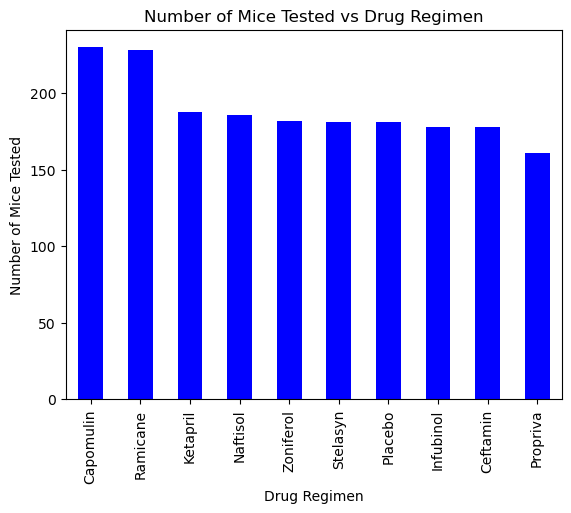

In [34]:
import matplotlib.pyplot as plt
mouse_count = combined_df['Drug Regimen'].value_counts()

# Create a bar plot of the number of mice tested for each drug regimen
plot_mice_drug = mouse_count.plot(kind='bar', color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested vs Drug Regimen")
plt.show()

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



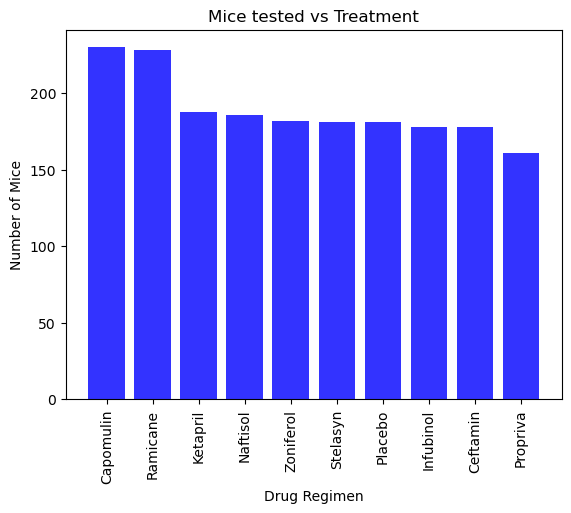

In [35]:
x_axis = mouse_count.index.values
y_axis = mouse_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Mice tested vs Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

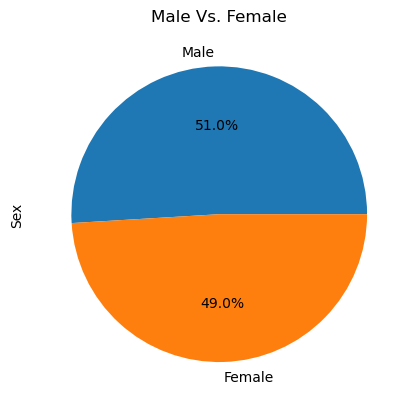

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
sex_data.plot.pie(autopct = "%1.1f%%")
plt.title("Male Vs. Female")
plt.show()

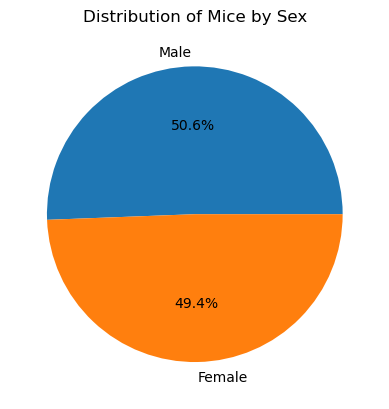

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = combined_df["Sex"].value_counts()

# Create a pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")

# Set the title
plt.title("Distribution of Mice by Sex")

# Show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
regimen_subset = combined_df[combined_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Find the last (greatest) timepoint for each mouse
last_timepoint = regimen_subset.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoint, regimen_subset, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)','Drug Regimen']]

# Preview the resulting dataframe
print(final_tumor_vol.head())

  Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0     a203         45           67.973419    Infubinol
1     a251         45           65.525743    Infubinol
2     a275         45           62.999356     Ceftamin
3     a411         45           38.407618     Ramicane
4     a444         45           43.047543     Ramicane


In [41]:
# Put treatments into a list for for loop
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data
tumor_vol_data = []

# Loop through each treatment in the treatments list
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the list of tumor volumes
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the results for this treatment
    print(f"{treatment}:")
    print(f"  - Interquartile Range (IQR): {iqr:.2f}")
    print(f"  - Lower Bound: {lower_bound:.2f}")
    print(f"  - Upper Bound: {upper_bound:.2f}")
    print(f"  - Potential Outliers: {outliers.values}\n")


Capomulin:
  - Interquartile Range (IQR): 7.78
  - Lower Bound: 20.70
  - Upper Bound: 51.83
  - Potential Outliers: []

Ramicane:
  - Interquartile Range (IQR): 9.10
  - Lower Bound: 17.91
  - Upper Bound: 54.31
  - Potential Outliers: []

Infubinol:
  - Interquartile Range (IQR): 11.48
  - Lower Bound: 36.83
  - Upper Bound: 82.74
  - Potential Outliers: [36.3213458]

Ceftamin:
  - Interquartile Range (IQR): 15.58
  - Lower Bound: 25.36
  - Upper Bound: 87.67
  - Potential Outliers: []



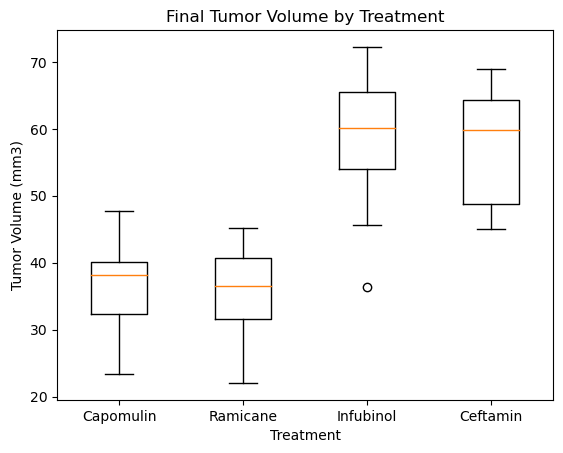

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot(tumor_vol_data, labels=treatments)

# Set the title and axis labels
ax.set_title("Final Tumor Volume by Treatment")
ax.set_xlabel("Treatment")
ax.set_ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()



## Line and Scatter Plots

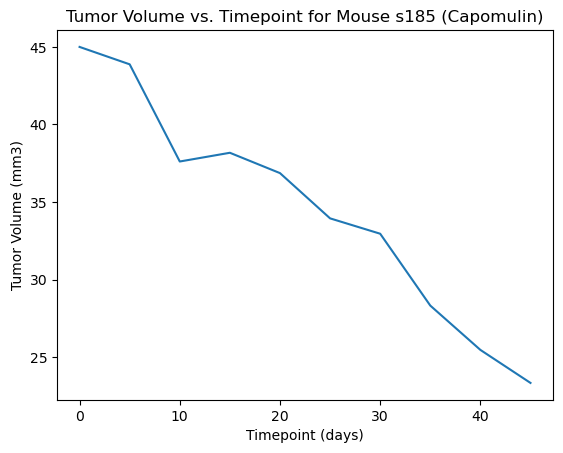

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select a mouse treated with Capomulin
mouse_id = 's185'
capomulin_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin') & (combined_df['Mouse ID'] == mouse_id)]

# Create a line plot
plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'])

# Set the title and axis labels
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()



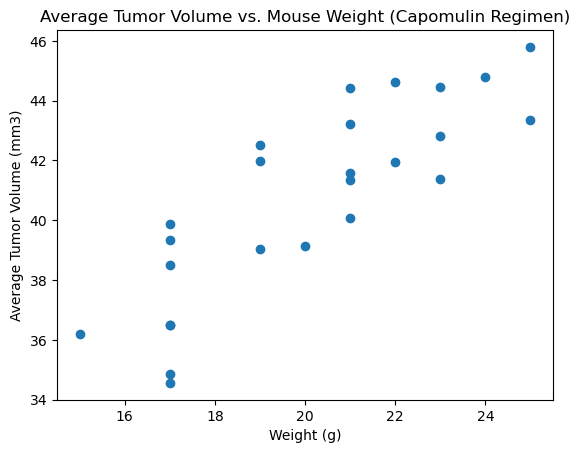

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Select the data for the Capomulin regimen
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_data = capomulin_df.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]

# Create a scatter plot
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Set the title and axis labels
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()



## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



The correlation coefficient between mouse weight and average tumor volume is 0.84.


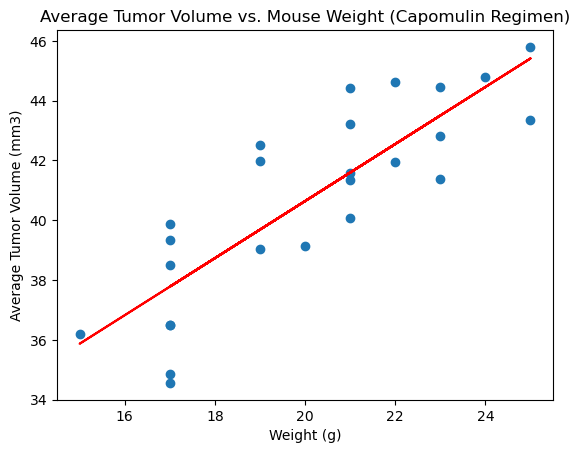

In [45]:
# Import the necessary libraries
from scipy.stats import linregress

# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {corr_coef}.")

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
regress_values = slope * avg_data['Weight (g)'] + intercept

# Create a scatter plot with linear regression line
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
plt.plot(avg_data['Weight (g)'], regress_values, color='red')

# Set the title and axis labels
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()
